In [65]:
#Importing necessary libaries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [66]:
df = pd.read_excel('Salary_data.xlsx')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [68]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

- The Years of experience and Age column are of incorrect data type. 
- There are two empty rows in the dataset

In [69]:
'''This line removes all rows containing missing values (NaNs) from the DataFrame df.
The inplace=True parameter modifies the DataFrame in place,
meaning it doesn't return a new DataFrame but instead applies the operation directly to df.
'''

df.dropna(inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [70]:
#Changing the age and years of experience data type from float to integer

df['Age'] = df['Age'].astype('int')
df['Years of Experience'] = df['Years of Experience'].astype('int')

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int32  
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    int32  
 5   Salary               373 non-null    float64
dtypes: float64(1), int32(2), object(3)
memory usage: 17.5+ KB


In [72]:
df.shape

(373, 6)

In [73]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.013405,100577.345845
std,7.069073,6.580546,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


Salaries in the dataset vary widely, ranging from a minimum of 350 to a maximum of 250,000.

The staffs are within the age 23 to 53

In [74]:
#Checking for duplicate values
df.duplicated().sum()

49

In [75]:
#Droping duplicated rows
df.drop_duplicates(inplace=True)

In [76]:
df.shape

(324, 6)

In [77]:
df.duplicated().sum()

0

### EDA

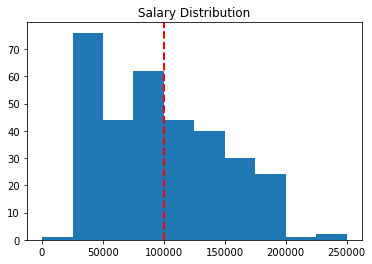

In [78]:
'''this code block provides a visual summary of the salary distribution in the DataFrame df, 
highlighting the mean salary value with a dashed red line.'''

plt.hist(df['Salary'])

#Plotting a line for the mean value in salary
plt.axvline(df['Salary'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Salary')

plt.title('Salary Distribution')
plt.show()

Majority of the salaries are below average 

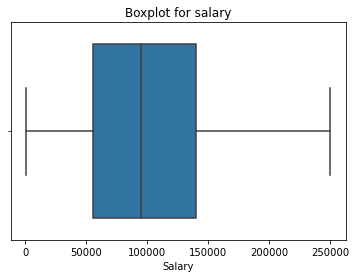

In [79]:
sb.boxplot(df['Salary'])
plt.title('Boxplot for salary')
plt.show()

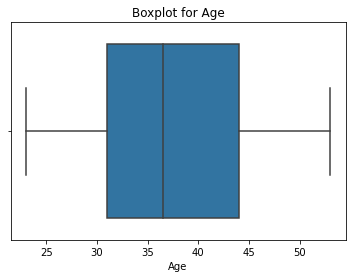

In [80]:
sb.boxplot(df['Age'])
plt.title('Boxplot for Age')
plt.show()

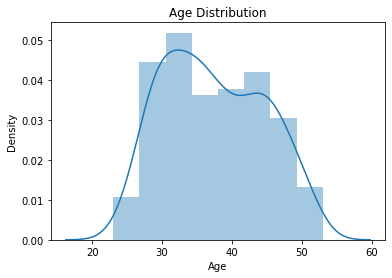

In [81]:
import warnings
warnings.filterwarnings("ignore")

sb.distplot(df['Age'])
plt.title('Age Distribution')
plt.show()

The values in the age column follows a normal distribution

In [82]:
#This line selects columns from the DataFrame df that have data types 'object' (typically string data) or 'category' (categorical data).
cat_features = df.select_dtypes(include=['object','category'])

In [83]:
cat_features

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
348,Female,Bachelor's,Junior Operations Manager
349,Male,Bachelor's,Senior Business Development Manager
350,Female,PhD,Senior Data Scientist
351,Male,Bachelor's,Junior Marketing Coordinator


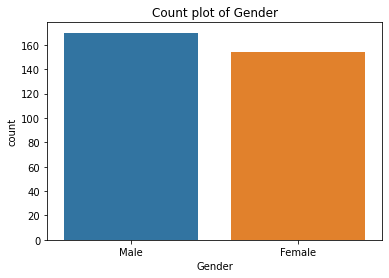

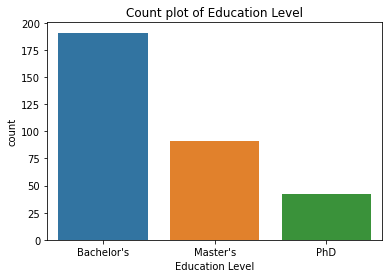

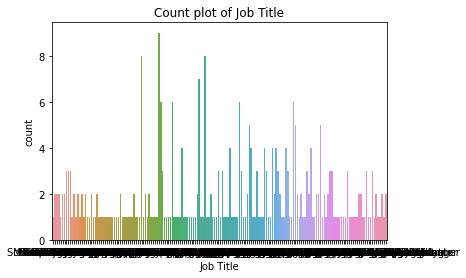

In [84]:
'''This line iterates over each column (feature) in cat_features.
and  creates a count plot for the current categorical feature (col) using Seaborn's countplot() function.

'''
for col in cat_features:
    sb.countplot(x=col, data=df) #sb.countplot(x='gender', data=df)
    plt.title(f'Count plot of {col}')
    plt.show()

,Age,Years of Experience,Salary
Age,1.000000,0.979451,0.916543
Years of Experience,0.979451,1.000000,0.924669
Salary,0.916543,0.924669,1.000000


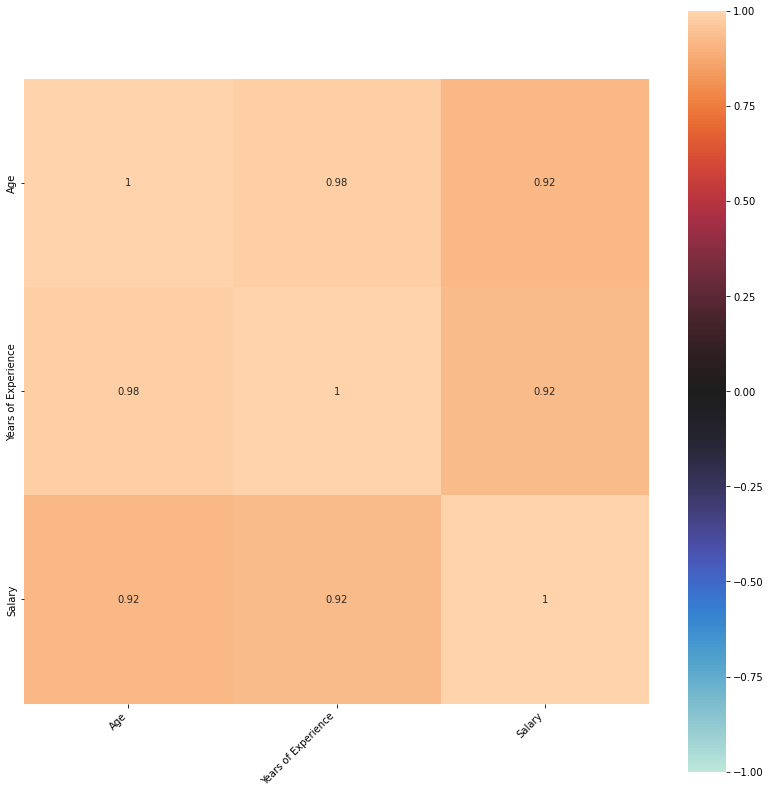

In [85]:


plt.figure(figsize=(14, 14))
ax = sb.heatmap(corr, vmin=-1, vmax=1, center=0, square=True, annot = True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

corr

This code block above calculates the correlation matrix between the columns 'Age', 'Years of Experience', and 'Salary' in the DataFrame df, 
and then visualizes the correlation matrix using a heatmapcorr = df[['Age', 'Years of Experience','Salary']].corr()

Correlation is a statistical measure that describes the relationship between two variables. 
it measures how changes in one variable are associated with changes in another variable.

The Pearson correlation coefficient measures the linear relationship between two continuous variables.
It ranges from -1 to 1

r=1 indicates a perfect positive linear relationship: 
As one variable increases, the other variable also increases proportionally.

r=−1 indicates a perfect negative linear relationship: 
As one variable increases, the other variable decreases proportionally.

r=0 indicates no linear relationship between the variables.

The high positive correlations among these variables suggest a positive relationship between the variables.

### Data Transformation

In [86]:
df['Education Level'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: Education Level, dtype: int64

In [87]:
'''This line imports the LabelEncoder class from the sklearn.preprocessing module.
LabelEncoder is used to convert categorical labels into numerical values.

'''
from sklearn.preprocessing import LabelEncoder 

In [88]:
'''This line initializes an instance of the LabelEncoder class, 
which will be used to transform categorical labels into numerical values.

'''

le = LabelEncoder()

In [89]:
cat_features

,Gender,Education Level,Job Title
0,Male,Bachelor's,Software Engineer
1,Female,Master's,Data Analyst
2,Male,PhD,Senior Manager
3,Female,Bachelor's,Sales Associate
4,Male,Master's,Director
...,...,...,...
348,Female,Bachelor's,Junior Operations Manager
349,Male,Bachelor's,Senior Business Development Manager
350,Female,PhD,Senior Data Scientist
351,Male,Bachelor's,Junior Marketing Coordinator


In the code below 

The first line starts a loop that iterates over each column in the DataFrame cat_features which  contains only categorical columns.

Inside the loop, it applies label encoding to each categorical column.

The fit_transform() method of the LabelEncoder class fits the encoder to the unique values of the column and then transforms the labels into numerical values.

The transformed numerical values are assigned back to the corresponding column in the DataFrame df, replacing the original categorical values with numerical representations.

In [90]:
for column in cat_features.columns:
    df[column] = le.fit_transform(df[column])   #df['gender'] = le.fit_transform(df['Gender'])

In [91]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,159,5,90000.0
1,28,0,1,17,3,65000.0
2,45,1,2,130,15,150000.0
3,36,0,0,101,7,60000.0
4,52,1,1,22,20,200000.0


In [92]:
df['Gender'].value_counts()

1    170
0    154
Name: Gender, dtype: int64

### Feature selection

X = df[['Years of Experience']] #Feature

This line creates a DataFrame X containing the feature(s) you want to use for prediction. Here, we are selecting the 'Years of Experience' column as the feature.
By using double square brackets [['Years of Experience']], we specifying that X should be a DataFrame with a single column.

y = df['Salary']    #Label/target

This line creates a Series y containing the target variable you want to predict. Here, we are selecting the 'Salary' column from the DataFrame df.
y will contain the values you want your model to predict based on the features provided in X.

In [93]:
X = df[['Years of Experience']] #Feature
y = df['Salary']    #Label/target

In [94]:
'''This block of code splits your dataset into training and testing sets using train_test_split() from scikit-learn.
X is the feature data, and y is the target variable.
test_size=0.3 specifies that 30% of the data will be used for testing, and 70% will be used for training.
random_state=0 ensures reproducibility by fixing the random seed.

'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [95]:
#This line imports the LinearRegression class from scikit-learn.
from sklearn.linear_model import LinearRegression

#This line creates an instance of the LinearRegression model and fits it to the training data (X_train and y_train) using the fit() method.
#The model learns the coefficients (weights) for the linear regression equation that best fits the training data.

model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [96]:
#This line retrieves the coefficients (slopes) of the linear regression model.

model.coef_

array([6781.73195064])

In [97]:
#This line retrieves the intercept of the linear regression model.

model.intercept_

33171.11202514991

Regression formular
y = 33171.11202514991 + 6781.73195064X

Y= B0 + B1 X.

In the regression formula, y represents the predicted salary, X represents the years of experience, 33171.11202514991 is the intercept term, and 6781.73195064 is the coefficient for the years of experience. 

This formula can be used to predict salaries based on years of experience using the trained linear regression model.

In [98]:
#evaluating the performance of your linear regression model using various regression metrics
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 342488998.5162043
RMSE: 18506.458292072104
R2: 0.8482469777979225


- from sklearn.metrics import mean_squared_error, r2_score

This line imports the necessary functions mean_squared_error and r2_score from scikit-learn for evaluating the performance of the model.

- predictions = model.predict(X_test)

This line generates predictions for the target variable using the trained linear regression model (model) and the test feature data (X_test).

- mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

This line calculates the mean squared error (MSE) between the actual target values (y_test) and the predicted values (predictions) using the mean_squared_error function.
MSE measures the average squared difference between the predicted values and the actual values. Lower MSE values indicate better model performance.
- rmse = np.sqrt(mse)
print("RMSE:", rmse)

This line calculates the root mean squared error (RMSE) by taking the square root of the MSE.
RMSE is a more interpretable metric than MSE, as it represents the average deviation of the predicted values from the actual values in the original units of the target variable.

-  r2 = r2_score(y_test, predictions)
print("R2:", r2)

This line calculates the coefficient of determination (R-squared) using the r2_score function.
R-squared measures the proportion of the variance in the target variable that is explained by the model. It ranges from 0 to 1, where higher values indicate better model fit to the data


-  (R-squared) value measures how well the linear regression model explains the variation in the target variable  based on the provided feature
  
-  An R2 value of 0 means that the model does not explain any of the variability in the salaries(target) . It's as if the model is not providing any useful information about why salaries differ between individuals.

- An R2  value of 1 means that the model perfectly explains all the variability in the salaries(target variable). It's as if the model can accurately predict every individual's salary solely based on their years of experience (feature)

The R2 value for the linear regression model created  is approximately 0.85, which means that the model explains about 85% of the variability in salaries based on years of experience, suggesting that the model performs relatively well in predicting salaries based on years of experience.

### Multi linear regression

In [99]:
X = df[['Years of Experience','Age','Education Level']]
y = df['Salary']

#here, we are selecting three columns as the features: 'Years of Experience', 'Age', and 'Education Level'.

###### You can also use SelectKBest with a simple setup to choose the top  features based on various scoring functions like chi2, f-regression etc

from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(k=2).fit_transform(X,y)

from sklearn.feature_selection import SelectKBest: 
This imports the SelectKBest class, which is used for feature selection based on univariate statistical tests.


X_new = SelectKBest(k=2).fit_transform(X, y): This line creates a new feature matrix X_new containing only the top 2 features selected by the default scoring function of SelectKBest.

k=2 specifies that you want to select the top 2 features.
.fit_transform(X, y) fits the feature selection model to the data (X and y) and transforms X to contain only the selected features.

In [100]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
348     35000.0
349    110000.0
350    160000.0
351     55000.0
371    170000.0
Name: Salary, Length: 324, dtype: float64

In [101]:
X

,Years of Experience,Age,Education Level
0,5,32,0
1,3,28,1
2,15,45,2
3,7,36,0
4,20,52,1
...,...,...,...
348,1,28,0
349,8,36,0
350,16,44,2
351,3,31,0


In [102]:
## Split the dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [103]:
# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [104]:
model.intercept_

-24399.483622194806

In [105]:
model.coef_

array([ 3641.33168166,  2193.55614758, 13587.88314402])

y = -24399.48 + 3641.33(x1) +2193.55(x2) + 13587.88(x3)

In [106]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", round(r2,2))

MSE: 255334154.19669232
RMSE: 15979.178771034896
R2: 0.89


In [107]:
r2_score(y_train, model.predict(X_train))

0.8841223972445522

#### Decision Tree Regressor

The code snippet below import the DecisionTreeRegressor class, which is used to create a decision tree model for regression tasks, and the export_text function, which is used to visualize the decision tree in text format

An instance of the DecisionTreeRegressor model (dt_model) is created and trained using the fit() method with the feature matrix X and target variable y. This allows the model to learn to predict the target variable based on the features using a decision tree algorithm.

The export_text() function from scikit-learn is used to generate a text representation of the decision tree model (dt_model).
The resulting textual description of the decision tree structure is stored in the tree variable.
The tree variable is then printed using the print() function, allowing for inspection of the decision tree structure in text format. This includes details about the splitting criteria at each node and the features used for splitting


In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
dt_model = DecisionTreeRegressor().fit(X, y)
print (dt_model, "\n")

# Visualize the model tree
tree = export_text(dt_model)
print(tree)

DecisionTreeRegressor() 

|--- feature_1 <= 40.50
|   |--- feature_0 <= 5.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- feature_1 <= 28.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 24.00
|   |   |   |   |   |   |   |   |--- value: [35000.00]
|   |   |   |   |   |   |   |--- feature_1 >  24.00
|   |   |   |   |   |   |   |   |--- value: [33333.33]
|   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |--- feature_1 <= 26.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 25.00
|   |   |   |   |   |   |   |   |   |--- value: [40000.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  25.00
|   |   |   |   |   |   |   |   |   |--- value: [38750.00]
|   |   |   |   |   |   |   |--- feature_1 >  26.50
|   |   |   |   |   |   |   |   |--- value: [35000.00]
|   |   |   |   |   |--- feature_1 >  28.50
|   |   |   |   |   |   |--- valu

In [94]:
# Evaluate the model using the test data
predictions = dt_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 95202480.95945105
RMSE: 9757.175870068708
R2: 0.9578168517256799


In [96]:
r2_score_training = r2_score(y_train,model.predict(X_train))
r2_score_training

0.9559189198308237

- The decision tree model gives more accuracy in prediction compared to Linear regression model

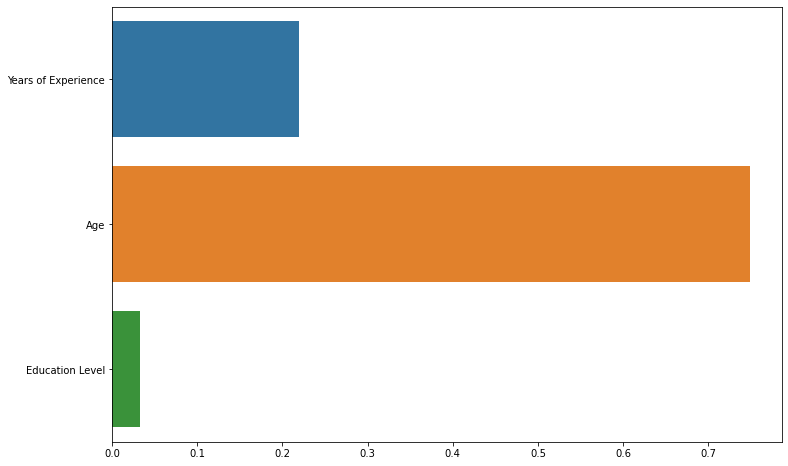

In [98]:
#feature importance

plt.figure(figsize=(12,8))

importance = dt_model.feature_importances_

sb.barplot(x=importance, y=X.columns)
plt.show()

 Feature importances represent the relative importance of each feature in predicting the target variable. Higher importance values indicate features that are more influential in making predictions.
 The feature importances from the trained decision tree regressor model (dt_model) is retrieved by calling the feature_importance method(dt_model.feature_importances_)
 
 A bar plot is created using Seaborn's barplot() function.
 
x=importance specifies the importance values as the x-axis (horizontal axis) of the plot.

y=X.columns specifies the feature names as the y-axis (vertical axis) of the plot.

X.columns returns the column names of the feature matrix X, which are used as labels for the y-axis.


Each bar in the plot represents the importance of a feature, and the height of the bar indicates the relative importance of that feature compared to others

  